<a href="https://www.kaggle.com/code/pathompongmuangthong/top-50-visited-websites-visualization?scriptVersionId=114088581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
import re

import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/the-top-websites-in-the-world/df_1.csv


# Load data and quick lookup =D

In [2]:
df = pd.read_csv('/kaggle/input/the-top-websites-in-the-world/df_1.csv')

In [3]:
df.head()

,Unnamed: 0,Site,Domain Name,Category,Principal country/territory
0,0,Google Search,google.com,Computers Electronics and Technology > Search ...,United States
1,1,YouTube,youtube.com,Arts & Entertainment > Streaming & Online TV,United States
2,2,Facebook,facebook.com,Computers Electronics and Technology > Social ...,United States
3,3,Twitter,twitter.com,Computers Electronics and Technology > Social ...,United States
4,4,Instagram,instagram.com,Computers Electronics and Technology > Social ...,United States


In [4]:
df['Principal country/territory'].nunique()

11

# Data Preprocessing

## Split Categories

In [5]:
# split category into main category and sub category
df['Category'] = df['Category'].apply(lambda x: x.split(' > '))
df['main_category'] = df['Category'].apply(lambda x: x[0])
df['sub_category'] = df['Category'].apply(lambda x: x[1] if len(x) > 1 else None)

## Get Countries Code

In [6]:
# get country code for plot graph
import pycountry
mapping = {country.name: country.alpha_3 for country in pycountry.countries}

df = df.replace(['Russia', 'Czech Republic', 'South Korea'],['Russian Federation', 'Czechia', 'Korea, Republic of'])

df['country'] = df['Principal country/territory'].apply(lambda x: mapping.get(x))

In [7]:
df.head()

,Unnamed: 0,Site,Domain Name,Category,Principal country/territory,main_category,sub_category,country
0,0,Google Search,google.com,"[Computers Electronics and Technology, Search ...",United States,Computers Electronics and Technology,Search Engines,USA
1,1,YouTube,youtube.com,"[Arts & Entertainment, Streaming & Online TV]",United States,Arts & Entertainment,Streaming & Online TV,USA
2,2,Facebook,facebook.com,"[Computers Electronics and Technology, Social ...",United States,Computers Electronics and Technology,Social Media Networks,USA
3,3,Twitter,twitter.com,"[Computers Electronics and Technology, Social ...",United States,Computers Electronics and Technology,Social Media Networks,USA
4,4,Instagram,instagram.com,"[Computers Electronics and Technology, Social ...",United States,Computers Electronics and Technology,Social Media Networks,USA


# Most Popular Main Category
* **48% of the top 50 visited websites are in Computers Electronics and Technology category**
* 16% News & Media Publishers
* 12% Adult

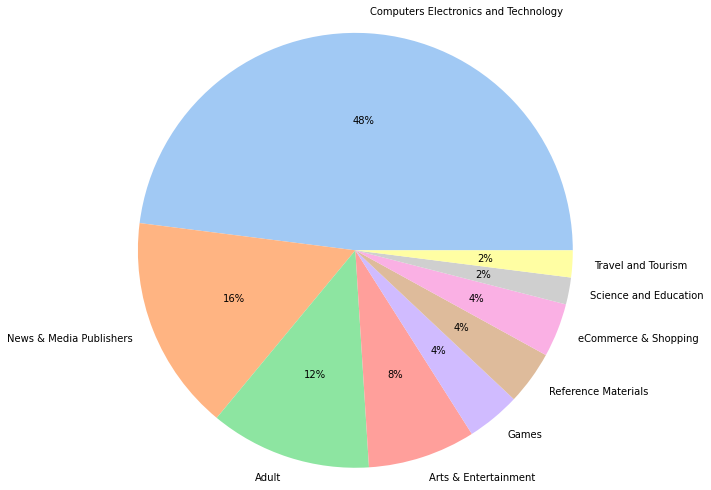

In [8]:
# plot pie chart
dfPlot = df.groupby('main_category').size().reset_index(name='size').sort_values(by='size', ascending=False)
colors = sb.color_palette('pastel')[0:9]
plt.pie(dfPlot['size'], labels=dfPlot['main_category'], colors=colors, autopct='%.0f%%', radius=2.5)
plt.show()

# Overall Most Sub-Category
* **People on the internet do love to visit/use social media a lot with 31%**
* 14% Search engines

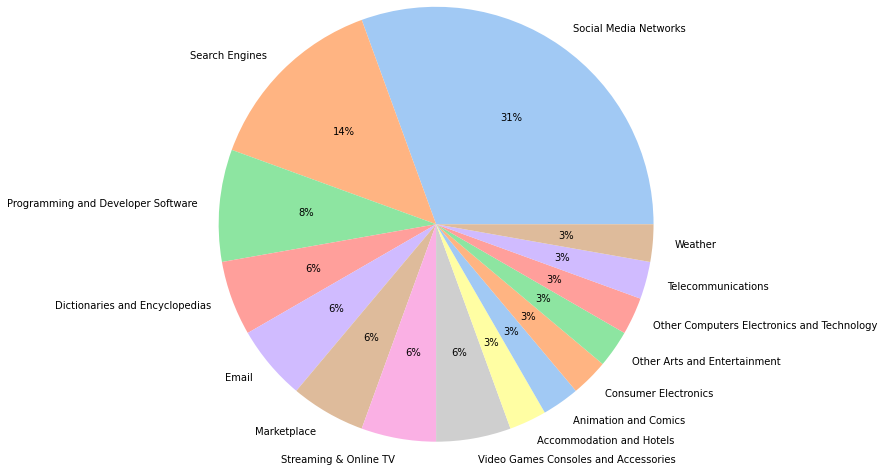

In [9]:
# plot pie chart
dfPlot = df.groupby('sub_category').size().reset_index(name='size').sort_values(by='size', ascending=False)
colors = sb.color_palette('pastel')[0:9]
plt.pie(dfPlot['size'], labels=dfPlot['sub_category'], colors=colors, autopct='%.0f%%', radius=2.5)
plt.show()

# Most Sub-Category in 'Computers Electronics and Technology category'
* **The most sub-category in 'Computers Electronics and Technology' is 'Social Media Networks' with 46%**
* 21% Search Engines
* 12% Programming and Developer Softweare

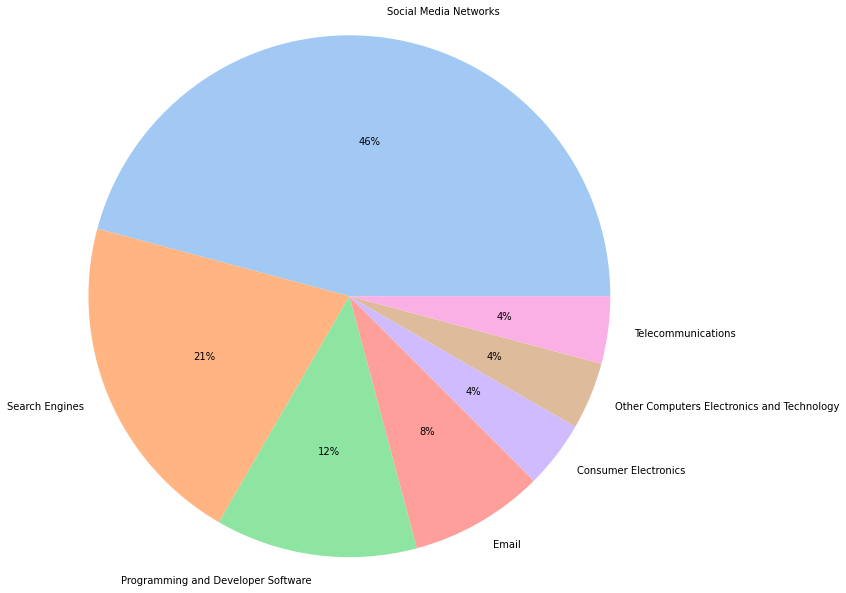

In [10]:
# plot pie chart
dfPlot = df.groupby(['main_category', 'sub_category'])['sub_category'].size().reset_index(name='size').sort_values(by='size', ascending=False)
dfPlot = dfPlot.loc[dfPlot['main_category'] == 'Computers Electronics and Technology']
colors = sb.color_palette('pastel')[0:9]
plt.pie(dfPlot['size'], labels=dfPlot['sub_category'], colors=colors, autopct='%.0f%%', radius=3)
plt.show()

# The countries where top 50 visited websites are based
* **USA is the most websites based country with 30 websites from 50 websites!**

/!\ This graph plot with Plotly sometime it might not appear in browser /!\

In [11]:
dfPlot = df.groupby('country').size().reset_index(name='size')
fig = px.choropleth(dfPlot, locations='country', color='size',
                           hover_name='country')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Most main-categories by based country
/!\ This graph plot with Plotly sometime it might not appear in browser /!\


In [12]:
dfPlot = df.groupby(['country', 'main_category'])['country'].size().reset_index(name='size').sort_values(by='size', ascending=True)
fig = px.scatter_geo(dfPlot, locations='country', color='main_category',
                           size='size',
                           hover_name='country',
                           hover_data=['main_category', 'size'],
                           projection='natural earth')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Summary
* In the top 50 visited websites, most of them are based in USA (60%)
* The most main categories are Computers Electronics and Technology (48%)
* People on the internet love to visited/used social media and do search with search engines websites

In [13]:
# ;ppp